In [1]:
import acoular
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import h5py
from scipy import signal

In [2]:
from utils.fonctions_utils import verification_position
from utils.geometrie import ordre_micros, coordonnees_micros

In [3]:
from utils.geometrie import *
from algos.beamforming import beamforming, broadband_beamforming
from algos.mvdr_beamforming import mvdr
from algos.music_beamforming import music
from utils.signal_gen_acoular import sine_generator, sine_w_hnoise_generator, white_noise_generator, plot_signal

In [4]:
CONFIG = pd.read_csv('config/config_input.csv', sep=";").set_index('params')
NSAMPLES = int(CONFIG.iloc[0, 0])
SAMPLING_FREQ = float(CONFIG.iloc[1, 0])
SIGNAL_FREQ = 1000

PAS_MICROS = 0.16

CELERITY = 340
k = 2 * np.pi * SIGNAL_FREQ / CELERITY

GRILLE_SOURCES = define_grille_source(
    HAUTEUR_SOURCES, LONGUEUR_SOURCES, PAS_SOURCES)

GRILLE_MICROS = define_grille_micros_xml(HAUTEUR_MICROS, LONGUEUR_MICROS, PAS_MICROS, 'utils/xml/micgeom.xml')

COORD_MICROS = coordonnees_micros_xml_sorted(path='utils/xml/micgeom.xml')

In [5]:
x, y = 1.75, 1.50

In [6]:
data = sine_generator(x, y, DISTANCE_SOURCES_MICROS,SIGNAL_FREQ,SAMPLING_FREQ, NSAMPLES)

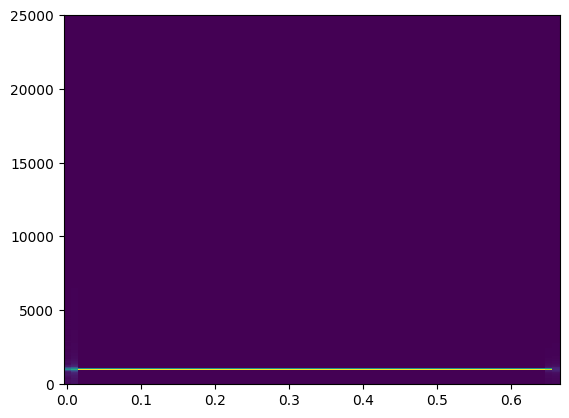

In [7]:
f, t, stft = signal.stft(data.T, nperseg=1000, fs=50000)
plt.pcolormesh(t, f, np.abs(stft[0]))

In [8]:
min = np.min(np.argmax(stft[0], axis=0))
max = np.max(np.argmax(stft[0], axis=0))
mean = (f[min] + f[max])/2
print(f"Indices range : [{min}, {max}]")
print(f"Frequency range : [{f[min]}, {f[max]}]")
print(f"Mean frequency : {mean}")
print(f"Best index : {int(mean//50)}")

Indices range : [19, 22]
Frequency range : [950.0, 1100.0]
Mean frequency : 1025.0
Best index : 20


In [9]:
Z = beamforming(data, array_manifold, SIGNAL_FREQ,
                     COORD_MICROS, ordre_micros, DISTANCE_SOURCES_MICROS,
                     GRILLE_SOURCES, NSAMPLES, PAS_SOURCES, CELERITY)

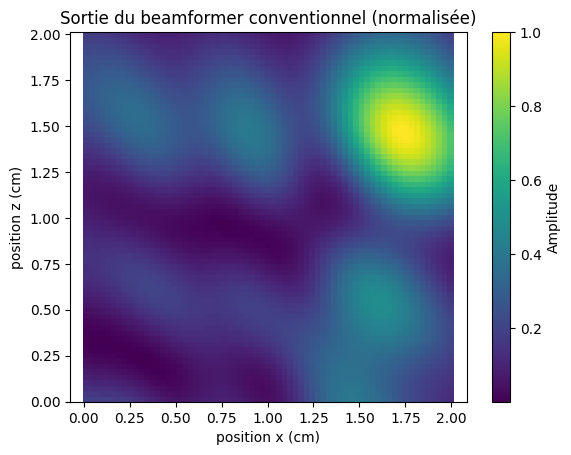

In [10]:
plt.pcolor(np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), Z)

plt.colorbar(label='Amplitude')
plt.axis('equal')
plt.xlabel('position x (cm)')
plt.ylabel('position z (cm)')
plt.title('Sortie du beamformer conventionnel (normalisée)')
plt.show()

In [11]:
Z = mvdr(data, array_manifold, SIGNAL_FREQ,
                     COORD_MICROS, ordre_micros, DISTANCE_SOURCES_MICROS,
                     GRILLE_SOURCES, NSAMPLES, PAS_SOURCES, CELERITY)

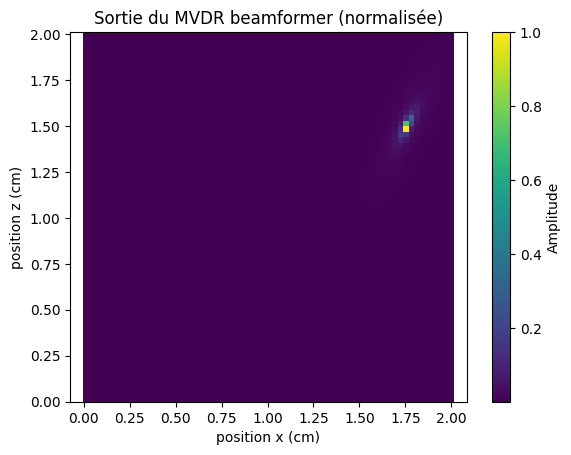

In [12]:
plt.pcolor(np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), Z)

plt.colorbar(label='Amplitude')
plt.axis('equal')
plt.xlabel('position x (cm)')
plt.ylabel('position z (cm)')
plt.title('Sortie du MVDR beamformer (normalisée)')
plt.show()

In [13]:
Z = music(data, array_manifold, SIGNAL_FREQ,
                     COORD_MICROS, ordre_micros, DISTANCE_SOURCES_MICROS,
                     GRILLE_SOURCES, NSAMPLES, PAS_SOURCES, CELERITY)

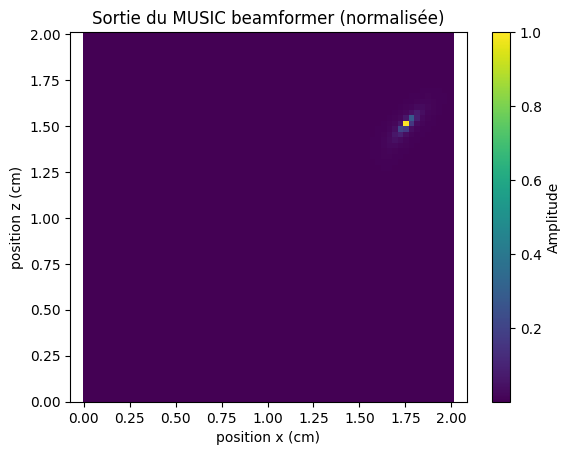

In [14]:
plt.pcolor(np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), Z)

plt.colorbar(label='Amplitude')
plt.axis('equal')
plt.xlabel('position x (cm)')
plt.ylabel('position z (cm)')
plt.title('Sortie du MUSIC beamformer (normalisée)')
plt.show()

/Users/eloidieme/Documents/vscode/localisation-acoustique-2023/utils/signal_gen_acoular.py:91: Warning: Up to Acoular 20.02, rms is interpreted as sine amplitude. This has since been corrected (rms now is 1/sqrt(2) of amplitude). Use 'amplitude' trait to directly set the ampltiude.
  sine = acoular.SineGenerator(
/Users/eloidieme/Documents/vscode/localisation-acoustique-2023/utils/signal_gen_acoular.py:93: Warning: Up to Acoular 20.02, rms is interpreted as sine amplitude. This has since been corrected (rms now is 1/sqrt(2) of amplitude). Use 'amplitude' trait to directly set the ampltiude.
  additional_sines = [acoular.SineGenerator(


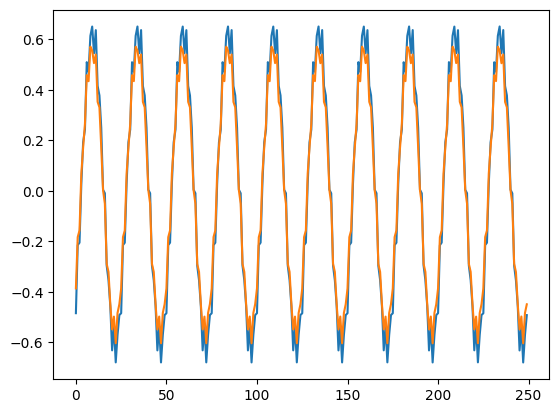

In [15]:
data = sine_w_hnoise_generator(x, y, DISTANCE_SOURCES_MICROS, 2000, SAMPLING_FREQ, NSAMPLES)

def butter_lowpass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff,
                            btype='low', analog=False)
    return b, a

b, a = butter_lowpass(20, fs=50000, order=2)
filtered = signal.filtfilt(b, a, data)

plt.plot(filtered[0:250, 0])
plt.plot(data[0:250, 0])

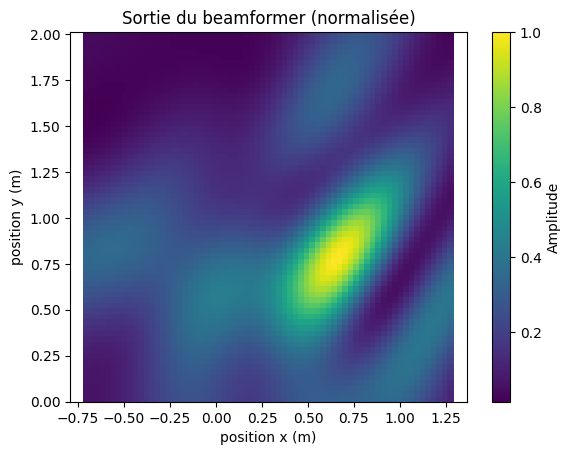

In [27]:
import scipy.io

mat = scipy.io.loadmat('data/enregistrements/3_2m_x_50_y_40_1000hz_15s.mat')
data = mat['mat'].T[:32768,:]

Z = beamforming(data, array_manifold, SIGNAL_FREQ,
                    COORD_MICROS, ordre_micros, DISTANCE_SOURCES_MICROS,
                    GRILLE_SOURCES, NSAMPLES, PAS_SOURCES, CELERITY)

plt.pcolor(np.arange(1.28 - 2, 1.28 + PAS_SOURCES, PAS_SOURCES), np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), np.flip(Z,axis=1))

plt.colorbar(label='Amplitude')
plt.axis('equal')
plt.xlabel('position x (m)')
plt.ylabel('position y (m)')
plt.title('Sortie du beamformer (normalisée)')
plt.show()

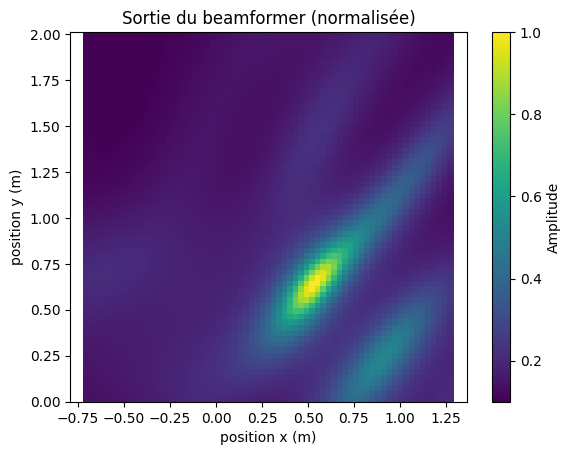

In [28]:
Z = music(data, array_manifold, SIGNAL_FREQ,
                     COORD_MICROS, ordre_micros, DISTANCE_SOURCES_MICROS,
                     GRILLE_SOURCES, NSAMPLES, PAS_SOURCES, CELERITY)

plt.pcolor(np.arange(1.28 - 2, 1.28 + PAS_SOURCES, PAS_SOURCES), np.arange(0, 2 + PAS_SOURCES, PAS_SOURCES), np.flip(Z,axis=1))

plt.colorbar(label='Amplitude')
plt.axis('equal')
plt.xlabel('position x (m)')
plt.ylabel('position y (m)')
plt.title('Sortie du beamformer (normalisée)')
plt.show()